In [1]:
from election_utils import generate_possible_answers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("outputs/encrypt_verify.csv")

In [4]:
def get_avg_time(df):
    return_df = df.copy()
    return_df[["avg_encrypt_time", "avg_verify_time"]] = 0
    for i, row in df.iterrows():
        num_possible_answers = len(generate_possible_answers(int(row.num_choices)))
        return_df.at[i, 'avg_encrypt_time'] = row.encrypt_time / num_possible_answers
        return_df.at[i, 'avg_verify_time'] = row.verify_time / num_possible_answers
        return_df.at[i, 'avg_encrypt_time_by_q'] = row.encrypt_time / (num_possible_answers * row.num_questions)
        return_df.at[i, 'avg_verify_time_by_q'] = row.verify_time / (num_possible_answers * row.num_questions)
    return return_df

def process_df_into_points(df):
    products = []
    avg_encrypts = []
    avg_verifies = []
    for i, row in df.iterrows():
        products.append(row.num_questions * row.num_choices)
        avg_encrypts.append(row[f"avg_encrypt_time"])
        avg_verifies.append(row[f"avg_verify_time"])
    return products, avg_encrypts, avg_verifies

def process_df_into_points_q(df):
    cs = []
    avg_encrypts = []
    avg_verifies = []
    for i, row in df.iterrows():
        cs.append(row.num_choices)
        avg_encrypts.append(row[f"avg_encrypt_time_by_q"])
        avg_verifies.append(row[f"avg_verify_time_by_q"])
    return cs, avg_encrypts, avg_verifies

def get_fit_line(x_data, y_data):
    coeffs = np.polyfit(x_data, y_data, 1)
    name = f"y = {coeffs[0]:0.3f}x + {coeffs[1]:0.3f}"
    x_line = np.linspace(1,max(x_data), len(x_data))
    line = np.poly1d(coeffs)
    y_line = line(x_line)
    return x_line, y_line, name

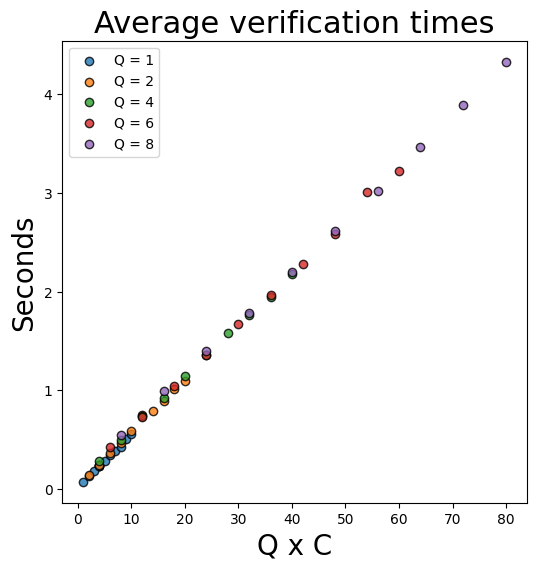

In [65]:
fig, ax = plt.subplots(figsize=(6,6))

return_df = get_avg_time(df)
num_questions = [1,2,4,6,8]
for num_question in num_questions:
    q_df = return_df[return_df.num_questions == num_question]
    
    products, avg_encrypts, avg_verifies = process_df_into_points(q_df)
    plt.scatter(products, avg_verifies, edgecolor='black', alpha=0.8, label=f"Q = {num_question}")
    plt.ylabel("Seconds", fontsize=20)
    plt.xlabel("Q x C", fontsize=20)
# plt.xlim(0,10.5)
# plt.ylim(0,0.7)
plt.legend()
_ = plt.title("Average verification times", fontsize=22)
# plt.savefig("plots/avg_encrypts_colored_by_q_zoom.png", dpi=300, bbox_inches='tight')

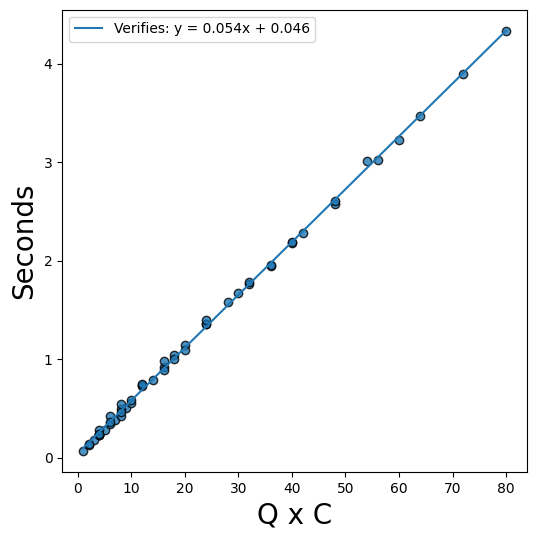

In [15]:
fig, ax = plt.subplots(figsize=(6,6))

return_df = get_avg_time(df)
products, avg_encrypts, avg_verifies = process_df_into_points(return_df)

plt.scatter(products, avg_verifies, edgecolor='black', alpha=0.8)
# plt.scatter(products, avg_encrypts, edgecolor='black', alpha=0.8)
x_line, y_line, name = get_fit_line(products, avg_verifies)
plt.plot(x_line, y_line, label=f"Verifies: {name}")
# x_line, y_line, name = get_fit_line(products, avg_encrypts)
# plt.plot(x_line, y_line, label=f"Encrypts: {name}")

# Annotate
plt.ylabel("Seconds", fontsize=20)
plt.xlabel("Q x C", fontsize=20)
# plt.xlim(0,10.5)
# plt.ylim(0,0.7)
_ = plt.legend()
# _ = plt.title("Average verification times", fontsize=22)

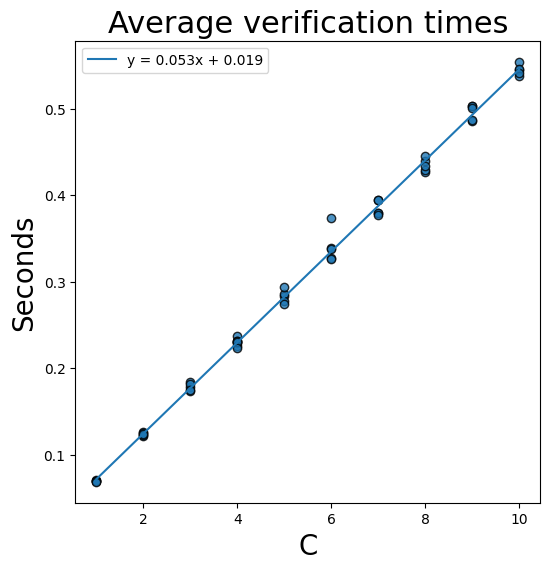

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

return_df = get_avg_time(df)
cs, avg_encrypts, avg_verifies = process_df_into_points_q(return_df)

plt.scatter(cs, avg_verifies, edgecolor='black', alpha=0.8)
# plt.scatter(cs, avg_encrypts, edgecolor='black', alpha=0.8)
x_line, y_line, name = get_fit_line(cs, avg_verifies)
plt.plot(x_line, y_line, label=f"{name}")
# x_line, y_line, name = get_fit_line(cs, avg_encrypts)
# plt.plot(x_line, y_line, label=f"Encrypts: {name}")

# Annotate
plt.ylabel("Seconds", fontsize=20)
plt.xlabel("C", fontsize=20)
# plt.xlim(0,10.5)
# plt.ylim(0,0.7)
_ = plt.legend()
_ = plt.title("Average verification times", fontsize=22)
plt.savefig("pres_plots/avg_verification_times_by_c.png", dpi=600, bbox_inches='tight')

In [73]:
coefficients = np.polyfit(products, avg_verifies, 1)
line = np.poly1d(coefficients)

In [74]:
line

poly1d([0.05360547, 0.04620681])

In [72]:
coefficients

array([0.05360547, 0.04620681])

In [17]:
return_df = get_avg_time(df)

/var/folders/nc/1qx970qn7p17yq9cmwrq9fmw0000gn/T/ipykernel_89452/2087910683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df.iloc[i]['avg_encrypt_time'] = 1 #row.encrypt_time / num_possible_answers
/var/folders/nc/1qx970qn7p17yq9cmwrq9fmw0000gn/T/ipykernel_89452/2087910683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df.iloc[i]['avg_verify_time'] = 1 #row.verify_time / num_possible_answers


In [13]:
return_df

,num_questions,num_choices,encrypt_time,verify_time,avg_encrypt_time,avg_verify_time
0,1,4,3.847,3.798,0,0
1,1,4,3.743,3.671,0,0
2,1,4,3.736,3.710,0,0
3,1,1,0.132,0.142,0,0
4,1,2,0.484,0.505,0,0
5,1,3,1.435,1.423,0,0
6,1,4,3.742,3.682,0,0
7,1,5,9.253,9.072,0,0
8,1,6,22.318,21.689,0,0
9,1,7,49.997,48.544,0,0


In [8]:
df

,num_questions,num_choices,encrypt_time,verify_time
0,1,4,3.847,3.798
1,1,4,3.743,3.671
2,1,4,3.736,3.710
3,1,1,0.132,0.142
4,1,2,0.484,0.505
5,1,3,1.435,1.423
6,1,4,3.742,3.682
7,1,5,9.253,9.072
8,1,6,22.318,21.689
9,1,7,49.997,48.544
